In [1]:
import cv2
from IPython.display import display, clear_output
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
smile = cv2.imread('smile.jpeg')
no_smile = cv2.imread('nosmile.jpeg')

Text(0.5, 1.0, 'No smile')

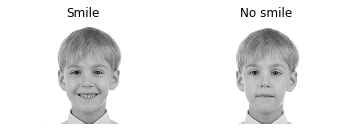

In [3]:
fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Smile')
ax[1].imshow(cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('off')
ax[1].set_title('No smile')

In [4]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

In [5]:
gray_smile = cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY)

In [6]:
faces = faceCascade.detectMultiScale(
        gray_smile,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
faces

array([[343, 179, 444, 444]], dtype=int32)

(-0.5, 1079.5, 719.5, -0.5)

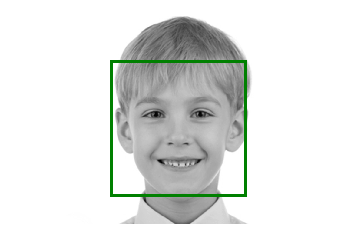

In [7]:
# draw a rectangle
from matplotlib.patches import Rectangle

# visualize the detected face
fig, ax = plt.subplots()
ax.imshow(gray_smile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size    
    (x_smile, y_smile, w_smile, h_smile) = face
    # draw a rectangle where the face is detected    
    ax.add_artist(Rectangle((x_smile, y_smile), w_smile, h_smile, fill=False, lw=3, color='green'))

ax.axis('off')

In [8]:
# convert the image to grayscale
gray_nosmile = cv2.cvtColor(no_smile, cv2.COLOR_BGR2GRAY)

# openCv algorithm to scan the image looking for haar features
faces = faceCascade.detectMultiScale(
        gray_nosmile,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
faces

array([[306, 179, 450, 450]], dtype=int32)

(-0.5, 1079.5, 719.5, -0.5)

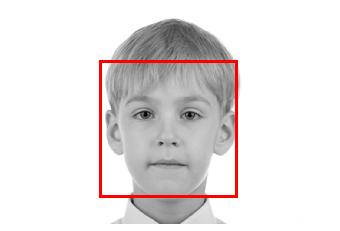

In [9]:
# visualize the detected face
fig, ax = plt.subplots()
ax.imshow(gray_nosmile, cmap='gray')

# iterate over all the detected faces
for face in faces:
    # retrieve the coordinates of the position of the current face, and its size
    (x_nosmile, y_nosmile, w_nosmile, h_nosmile) = face
    
    # draw a rectangle where the face is detected
    ax.add_artist(Rectangle((x_nosmile, y_nosmile),w_nosmile, h_nosmile, fill=False, lw=3, color='red'))

ax.axis('off')

### Parte 2: Procesamiento de datos - Estandarización de rostros

In [10]:
# select only the face portion from the smile test image
face_smile = gray_smile[y_smile:y_smile+h_smile, x_smile:x_smile+w_smile]

# The cropping coefficient for determining the size of the face
c1 = 0.2

# calculate how to crop the face
# vertical dimension
v_cut = int(c1 * w_smile)
# horizontal dimension
h_cut = int(c1 * h_smile)

# select only the face portion from the smile test image
cut_face_smile = gray_smile[y_smile+v_cut:y_smile+h_smile, 
                      x_smile+h_cut:x_smile-h_cut+w_smile]

In [11]:
# select only the face portion from the non-smile test image
face_nosmile = gray_nosmile[y_nosmile:y_nosmile+h_nosmile, x_nosmile:x_nosmile+w_nosmile]

# The cropping coefficient for determining the size of the face
c2 = 0.2

# calculate how to crop the face 
# vertical dimension
v_cut = int(c2 * w_nosmile)
# horizontal dimension
h_cut = int(c2 * h_nosmile)

# select only the face portion from the non smile test image
cut_face_nosmile = gray_nosmile[y_nosmile+v_cut:y_nosmile+h_nosmile, 
                      x_nosmile+h_cut:x_nosmile-h_cut+w_nosmile]

(-0.5, 269.5, 359.5, -0.5)

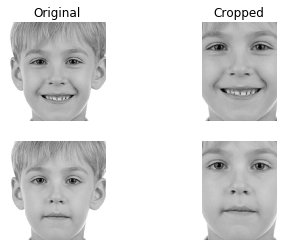

In [12]:
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(face_smile, cmap='gray')
ax[0][0].axis('off')
ax[0][0].set_title('Original')

ax[0][1].imshow(cut_face_smile, cmap='gray')
ax[0][1].axis('off')
ax[0][1].set_title('Cropped')

ax[1][0].imshow(face_nosmile, cmap='gray')
ax[1][0].axis('off')
ax[1][1].imshow(cut_face_nosmile, cmap='gray')
ax[1][1].axis('off')

#### ¿Cómo afectarían los dos coeficientes (cv y ch) a los rostros detectados?


In [13]:
# import the numpy and scipy libraries to zoom the images
import numpy as np
from scipy.ndimage import zoom

# transform the stretched smiling face so that it has 64x64 pixels
standardized_face_smile = zoom(cut_face_smile, (64. / cut_face_smile.shape[0], 
                                           64. / cut_face_smile.shape[1])).astype(np.float32)

In [14]:
standardized_face_smile /= float(255)

In [15]:
standardized_face_nosmile = zoom(cut_face_nosmile, (64. / cut_face_nosmile.shape[0], 
                                           64. / cut_face_nosmile.shape[1])).astype(np.float32)
standardized_face_nosmile /= float(255)

(-0.5, 63.5, 63.5, -0.5)

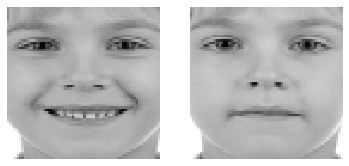

In [16]:
plt.subplot(121)
plt.imshow(standardized_face_smile[:, :], cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(standardized_face_nosmile[:, :], cmap='gray')
plt.axis('off')

### Parte 3: Cargar un modelo previamente entrenado

In [18]:
import pickle as pkl

# load LR model
with open('support_vector_machines.pkl', 'rb') as f:
    classifier = pkl.load(f, encoding='iso-8859-1')

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator SVC from version pre-0.18 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [19]:
pred = 0
print (pred)

0


In [20]:
answers = {0: 'NOT SMILING.', 1:'SMILING.'}

The person in this picture is NOT SMILING.


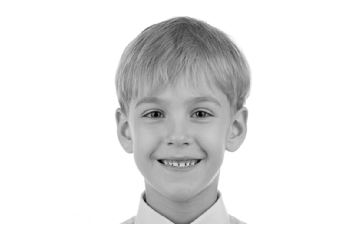

In [23]:
plt.imshow(gray_smile[:, :], cmap='gray')
plt.axis('off')
print ('The person in this picture is', answers[pred])

### Conclusiones: Zamora Guerrero Jose Angel
lo que vimos con este programa fue bastante interezante porque se intento reconoser lo que son las sonrisas de una persona, personalmente es la primera vez que usa este medio y me resulto algo complucado de adaptarme pero ya le voy entendiendo.
por otro lado vimos que por rener otra version del pyton no pudomos terminar esta practica, aparentemente nesicitabamos la version 0.18 y nosotros teniamos la 0.20 y eso fue lo que no nos dejo terminar esta practica.
por un lado esperemos que en un futuro podamos completar esta pracica porque si es algo muy interesante e importente de entender.